#  DATASCIENCE PROJECT @ THE SPARKS FOUNDATION

## GRIP TASK-4:(DATA ANALYSIS GLOBAL TERRORISM):

### AURHOR-SPARSH JAIN

In [1]:
#IMPORTING NECESSARY LIBRARY 

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\COMP\SPARKS\TASK 4\GlobalTerrorism.csv",encoding="latin1")
df

D:\SOFTWARES\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


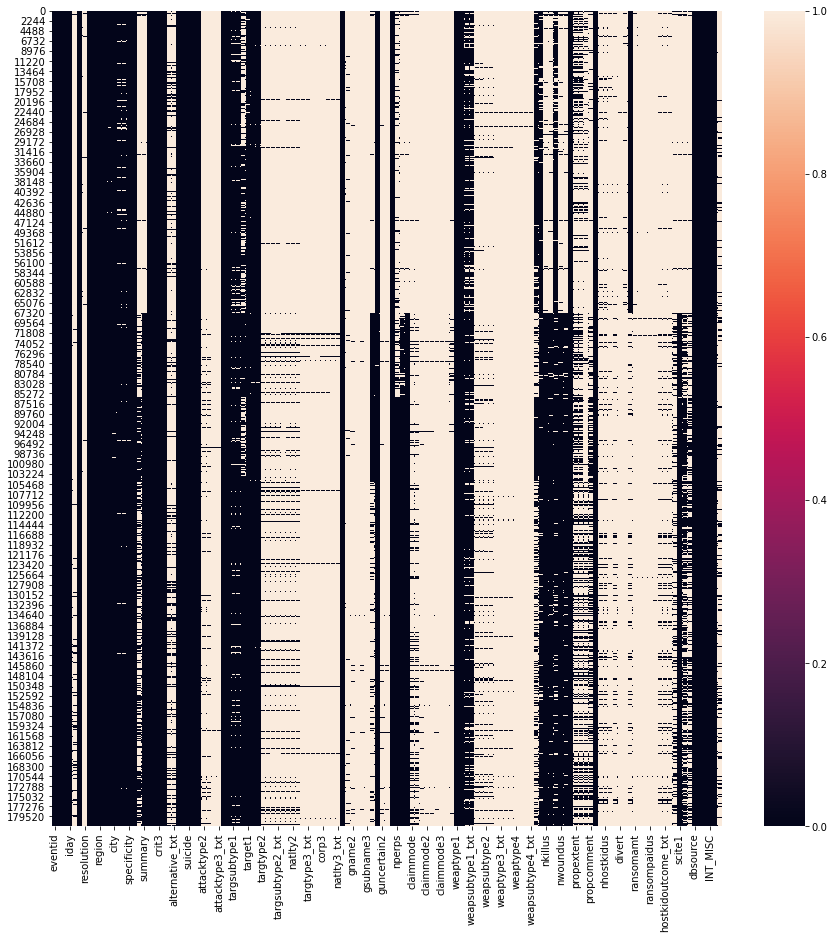

In [5]:
fig=plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())
plt.show()

## DATA CLEANING AND DATA PREPROCESSING: 

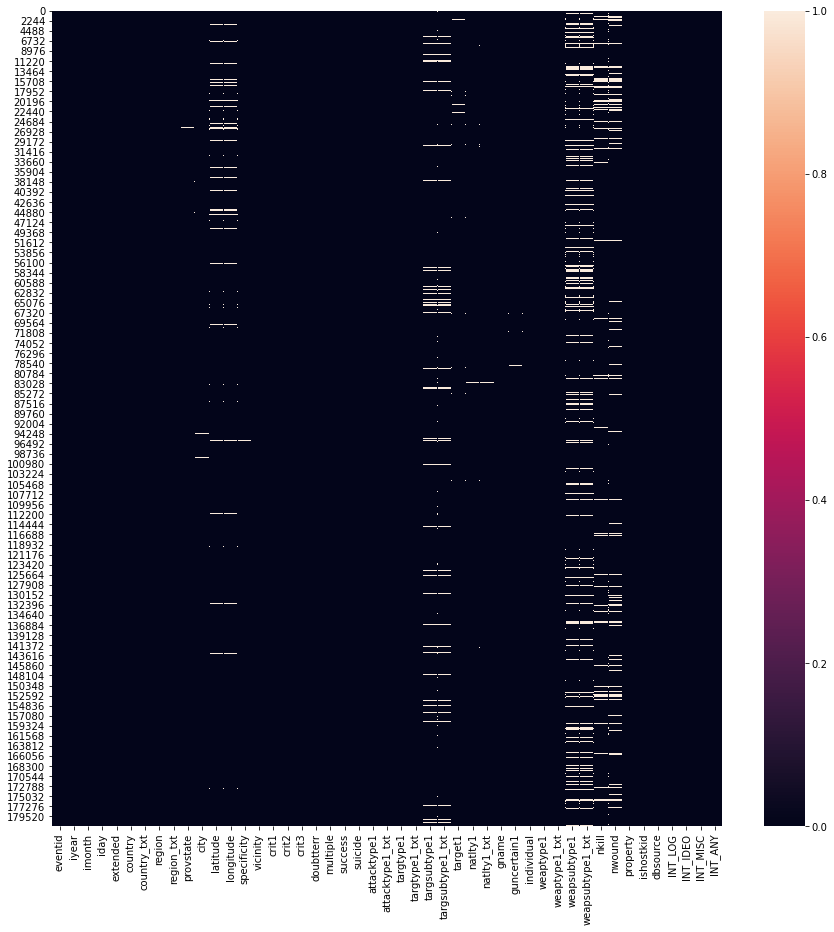

In [6]:
f=df.isnull().sum()/df.shape[0]*100
drop_column=f[f>20].keys()
df2=df.drop(columns=drop_column)

fig=plt.figure(figsize=(15,15))
sns.heatmap(df2.isnull())
plt.show()


In [7]:
f2=df2.isnull().sum()/df.shape[0]*100
f2=f2[f2>0]
print(f2)
print(f2.shape)

provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
doubtterr            0.000550
multiple             0.000550
targsubtype1         5.709144
targsubtype1_txt     5.709144
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
guncertain1          0.209146
weapsubtype1        11.430396
weapsubtype1_txt    11.430396
nkill                5.676120
nwound               8.977330
ishostkid            0.097969
dtype: float64
(18,)


In [8]:
df2.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type","city":"City",
                   "gname":"Group Name","weaptype1_txt":"Weapon Type","nkill":"Killed","nwound":"Wounded","provstate":"Provstate"},inplace=True)
df2

,eventid,Year,Month,Day,extended,country,Country,region,Region,Provstate,...,weapsubtype1_txt,Killed,Wounded,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [9]:
df2=df2[["Year","Month","Day","Country","Region","Provstate","City","Attack Type","Group Name","Target Type",
         "Weapon Type","Killed","Wounded"]]

In [10]:
df2.isnull().sum()/df2.shape[0]*100

Year           0.000000
Month          0.000000
Day            0.000000
Country        0.000000
Region         0.000000
Provstate      0.231712
City           0.238867
Attack Type    0.000000
Group Name     0.000000
Target Type    0.000000
Weapon Type    0.000000
Killed         5.676120
Wounded        8.977330
dtype: float64

In [11]:
df2['Killed'] = df2['Killed'].fillna(df2['Killed'].mean()).round(decimals=0)
df2['Wounded'] = df2['Wounded'].fillna(df2['Wounded'].mean()).round(decimals=0)
df2["Affected"]=df2["Killed"]+df2["Wounded"]

<ipython-input-11-d7edad107d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Killed'] = df2['Killed'].fillna(df2['Killed'].mean()).round(decimals=0)
<ipython-input-11-d7edad107d8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Wounded'] = df2['Wounded'].fillna(df2['Wounded'].mean()).round(decimals=0)
<ipython-input-11-d7edad107d8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [12]:
df2['City'] = df2['City'].fillna(df2['City'].mode()[0])
df2['Provstate'] = df2['Provstate'].fillna(df2['Provstate'].mode()[0])

<ipython-input-12-2c478df4f2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['City'] = df2['City'].fillna(df2['City'].mode()[0])
<ipython-input-12-2c478df4f2f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Provstate'] = df2['Provstate'].fillna(df2['Provstate'].mode()[0])


In [13]:
df2.isnull().sum()/df2.shape[0]*100

Year           0.0
Month          0.0
Day            0.0
Country        0.0
Region         0.0
Provstate      0.0
City           0.0
Attack Type    0.0
Group Name     0.0
Target Type    0.0
Weapon Type    0.0
Killed         0.0
Wounded        0.0
Affected       0.0
dtype: float64

In [14]:
df2

,Year,Month,Day,Country,Region,Provstate,City,Attack Type,Group Name,Target Type,Weapon Type,Killed,Wounded,Affected
0,1970,7,2,Dominican Republic,Central America & Caribbean,Baghdad,Santo Domingo,Assassination,MANO-D,Private Citizens & Property,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),23rd of September Communist League,Government (Diplomatic),Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Unknown,Journalists & Media,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Unknown,Government (Diplomatic),Explosives,2.0,3.0,5.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Unknown,Government (Diplomatic),Incendiary,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Al-Shabaab,Military,Firearms,1.0,2.0,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Muslim extremists,Military,Explosives,2.0,7.0,9.0
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,0.0,0.0,0.0
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Unknown,Government (General),Explosives,0.0,0.0,0.0


In [15]:
df2.describe()

,Year,Month,Day,Killed,Wounded,Affected
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.380382,3.152611,5.532993
std,13.259430,3.388303,8.814045,11.213665,34.297829,40.550970
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,3.000000,5.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


####  Some Observations from this DATA PROCESSING:

1. Maximum number of people got Killed in an attack: 1570
2. Maximum number of people got Wounded in an attack: 8191
3. Maximum number of people got Affected in an attack: 9574

## EXPLORATORY DATA ANALYSIS:

### 1) YEAR WISE ANALYSIS:

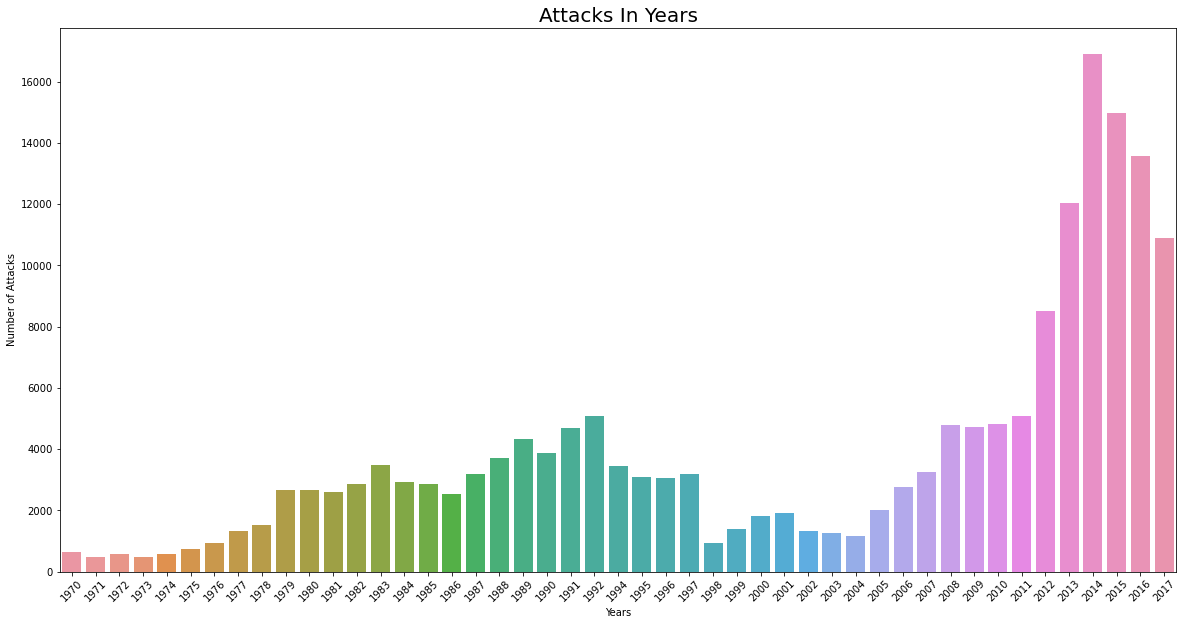

In [16]:
year = df2['Year'].unique()
y_count = df2['Year'].value_counts(dropna = False).sort_index()


plt.figure(figsize = (20,10))
sns.barplot(x = year,y = y_count)
plt.xticks(rotation = 45)
plt.xlabel('Years',fontsize=10)
plt.ylabel('Number of Attacks',fontsize=10)
plt.title('Attacks In Years', fontsize=20)
plt.show()

In [17]:
f1=pd.Series(y_count).to_frame()
f1.columns=['ATTACKS']
f1

,ATTACKS
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526
1979,2662


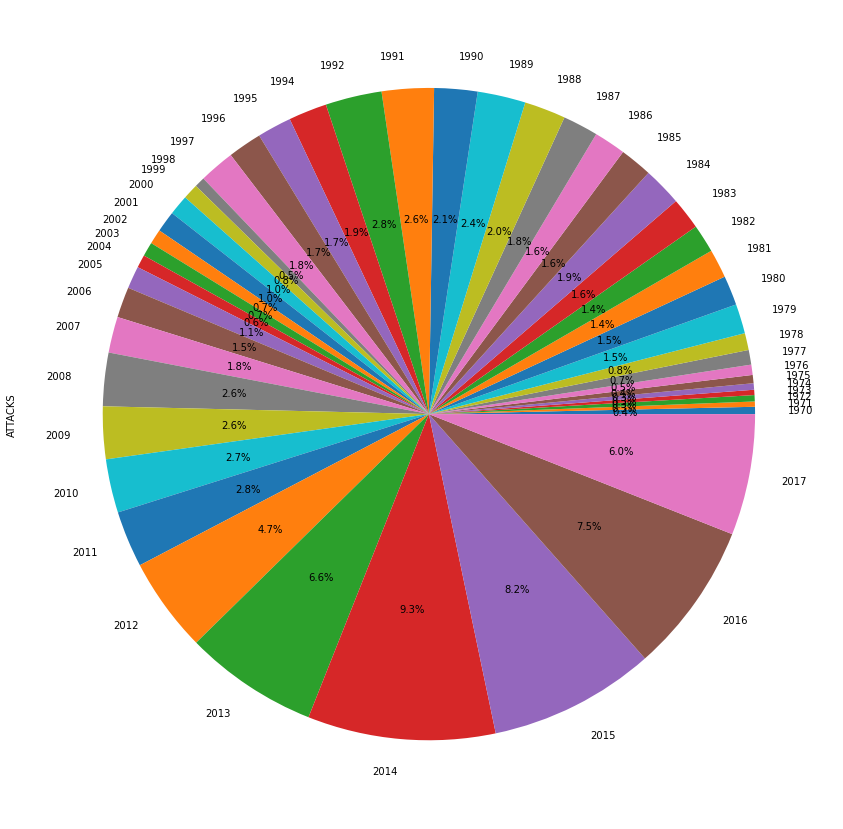

In [18]:
plt.figure(figsize=(15,15))
f1['ATTACKS'].plot(kind='pie', autopct="%.1f%%")
plt.show()

In [19]:
fy1=f1.sort_values('ATTACKS')
fy1.head(5)

,ATTACKS
1971,471
1973,473
1972,568
1974,581
1970,651


In [20]:
fy1.tail(5)

,ATTACKS
2017,10900
2013,12036
2016,13587
2015,14965
2014,16903


1. Maximum Attack took place in the year 2014 i.e. 16903
2. Minimum Attack took place in the year 1971 i.e. 471

In [21]:
fy2=df2[["Year","Killed","Wounded","Affected"]].groupby("Year").sum()
fy2.head(5)

,Killed,Wounded,Affected
Year,,,
1970,258.0,368.0,626.0
1971,301.0,517.0,818.0
1972,654.0,1390.0,2044.0
1973,468.0,1182.0,1650.0
1974,655.0,1552.0,2207.0


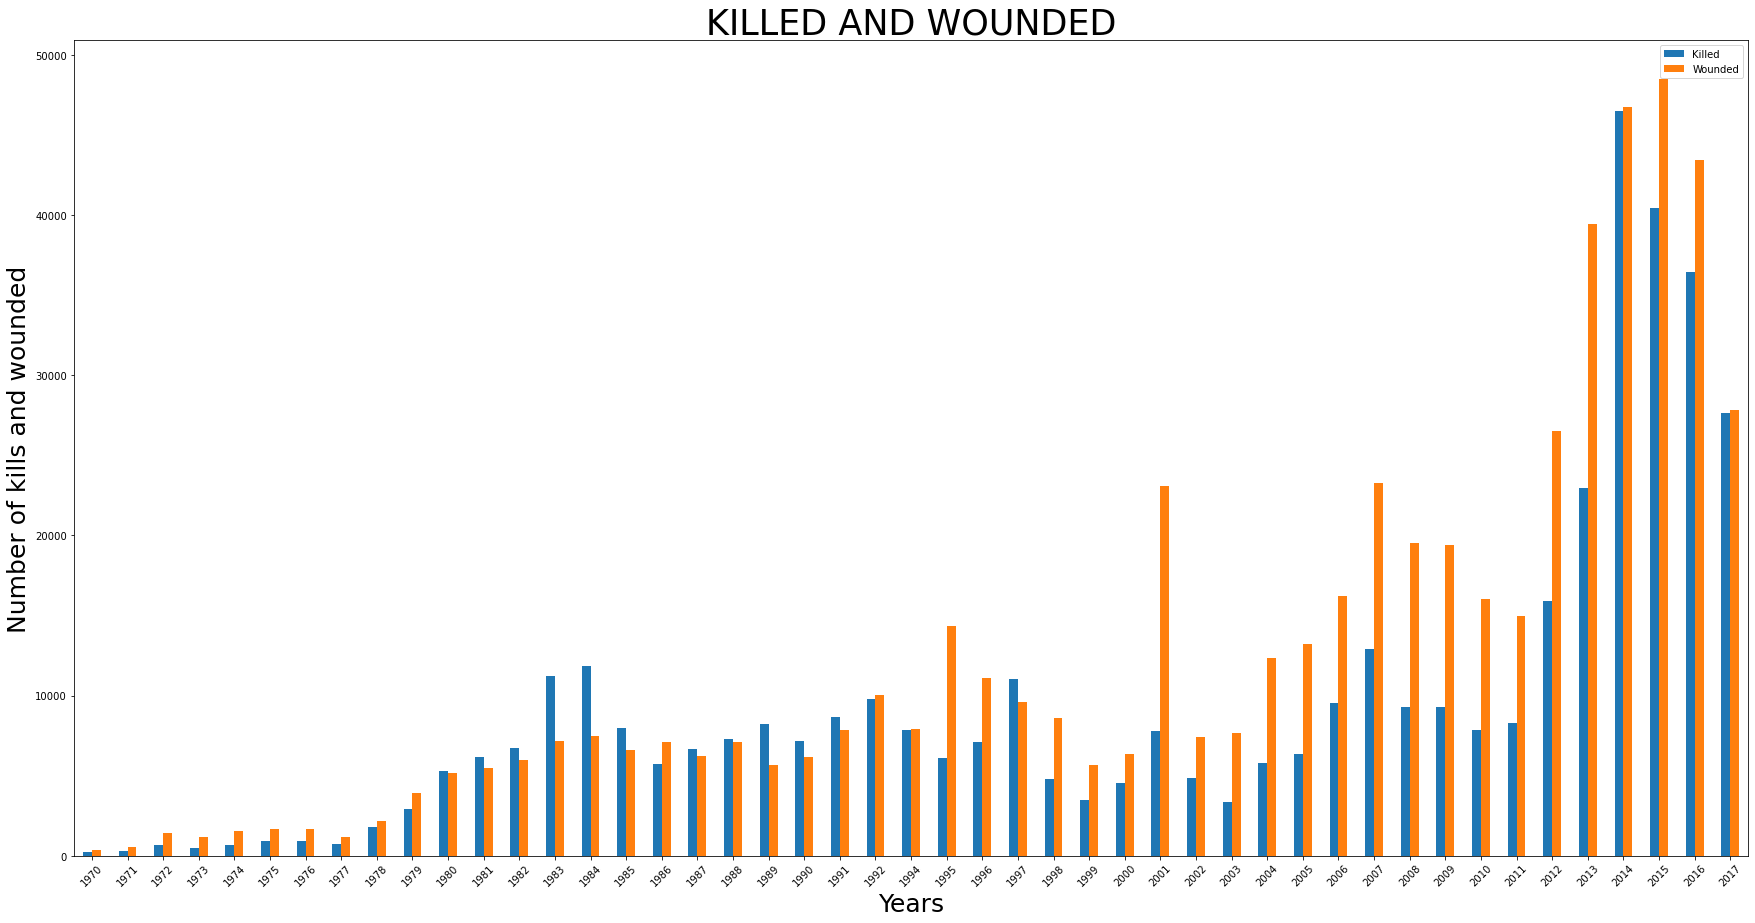

In [22]:
plt.rcParams["figure.figsize"] = (30,15)
fy2.plot(y=["Killed", "Wounded"], kind="bar")

plt.xticks(rotation = 45)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of kills and wounded',fontsize=25)
plt.title('KILLED AND WOUNDED', fontsize=35)
plt.show()

In [23]:
f2=fy2.sort_values('Killed')
print("\t"+"KILLED STATS")
print("HEAD:")
print(f2.head(5))
print("\n"+"TAIL:")
print(f2.tail(5))

	KILLED STATS
HEAD:
      Killed  Wounded  Affected
Year                           
1970   258.0    368.0     626.0
1971   301.0    517.0     818.0
1973   468.0   1182.0    1650.0
1972   654.0   1390.0    2044.0
1974   655.0   1552.0    2207.0

TAIL:
       Killed  Wounded  Affected
Year                            
2013  22975.0  39434.0   62409.0
2017  27675.0  27804.0   55479.0
2016  36427.0  43451.0   79878.0
2015  40463.0  48495.0   88958.0
2014  46534.0  46729.0   93263.0


In [24]:
f2=fy2.sort_values('Wounded')
print("\t"+"WOUNDED STATS")
print("HEAD:")
print(f2.head(5))
print("\n"+"TAIL:")
print(f2.tail(5))

	WOUNDED STATS
HEAD:
      Killed  Wounded  Affected
Year                           
1970   258.0    368.0     626.0
1971   301.0    517.0     818.0
1977   716.0   1163.0    1879.0
1973   468.0   1182.0    1650.0
1972   654.0   1390.0    2044.0

TAIL:
       Killed  Wounded  Affected
Year                            
2017  27675.0  27804.0   55479.0
2013  22975.0  39434.0   62409.0
2016  36427.0  43451.0   79878.0
2014  46534.0  46729.0   93263.0
2015  40463.0  48495.0   88958.0


#### Some Observation from Graph:

1. Maximum number of Kills in the year 2014 i.e. 46534
2. Maximum number of Wounded in the year 2015 i.e. 48495
3. Minimum number of Kills in the year 1970 i.e. 258
4. Minimum number of Wounded in the year 1970 i.e. 368

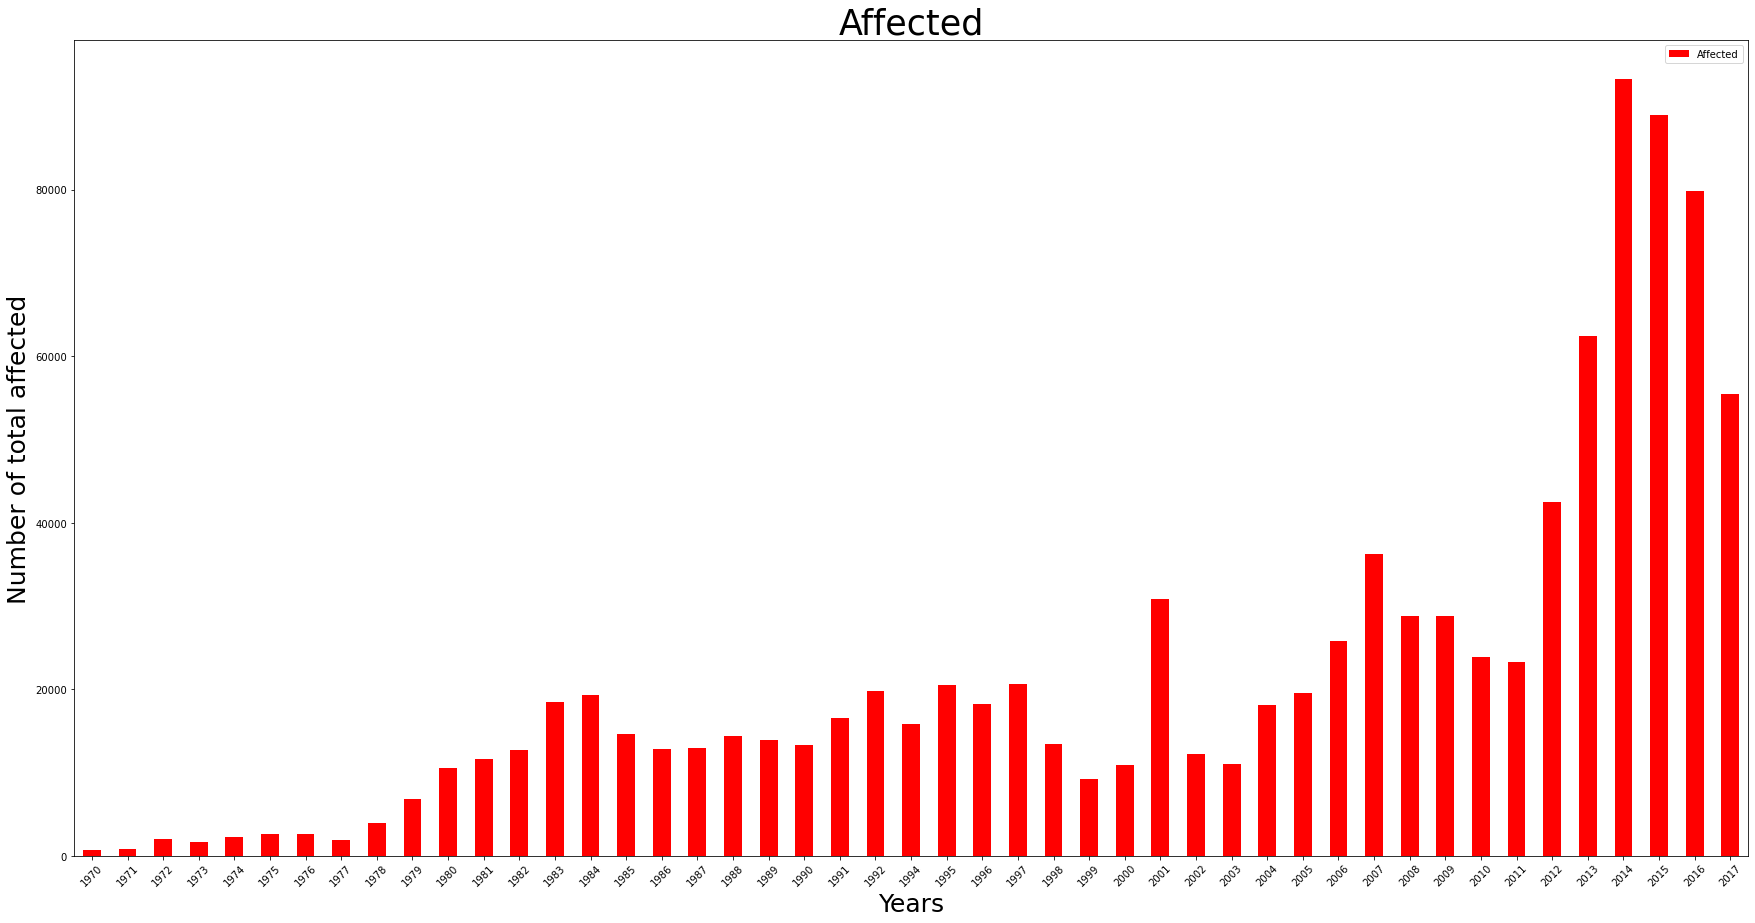

In [25]:
plt.rcParams["figure.figsize"] = (30,15)
fy2.plot(y=["Affected"], kind="bar",color="red")

plt.xticks(rotation = 45)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of total affected',fontsize=25)
plt.title('Affected', fontsize=35)
plt.show()

#### Some observation from Graph:

1. Most number of Affected Persons is in the year 2014 i.e 93263
2. Minimum number of Affected Persons is in the year 1970 i.e 626

### 2) REGION WISE ANALYSIS:

In [26]:
table=pd.crosstab(df2.Year,df2.Region)
table.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


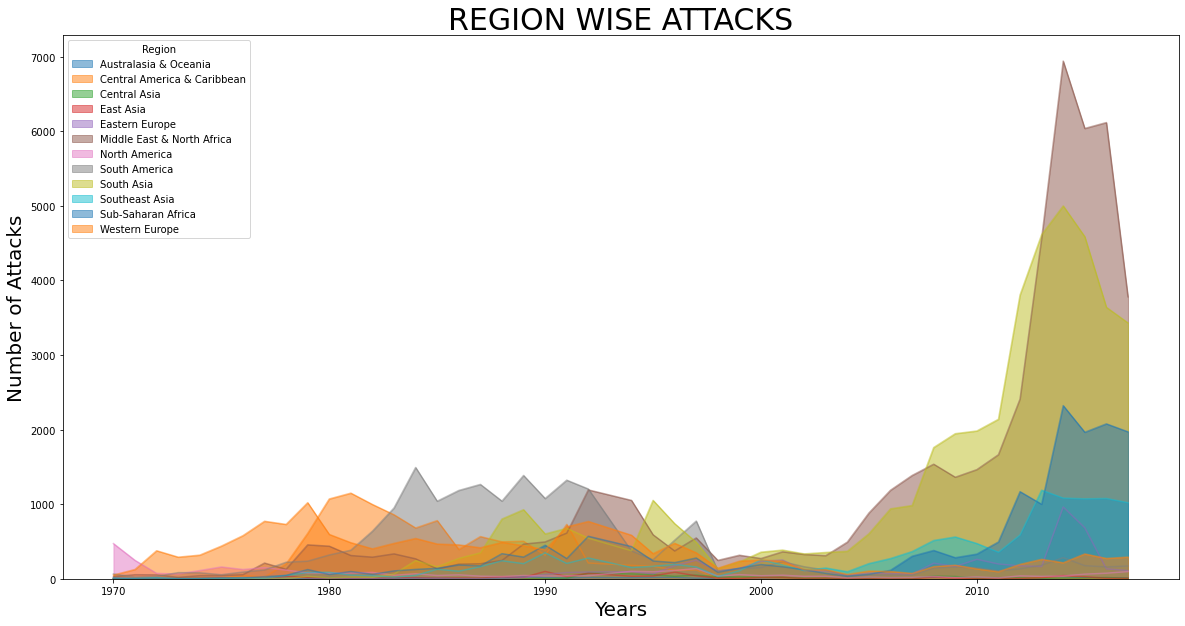

In [27]:
table.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("REGION WISE ATTACKS",fontsize=30)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [28]:
reg=table.transpose()
reg["Total"]=reg.sum(axis=1)
region=reg["Total"].sort_values(ascending=False)
region

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

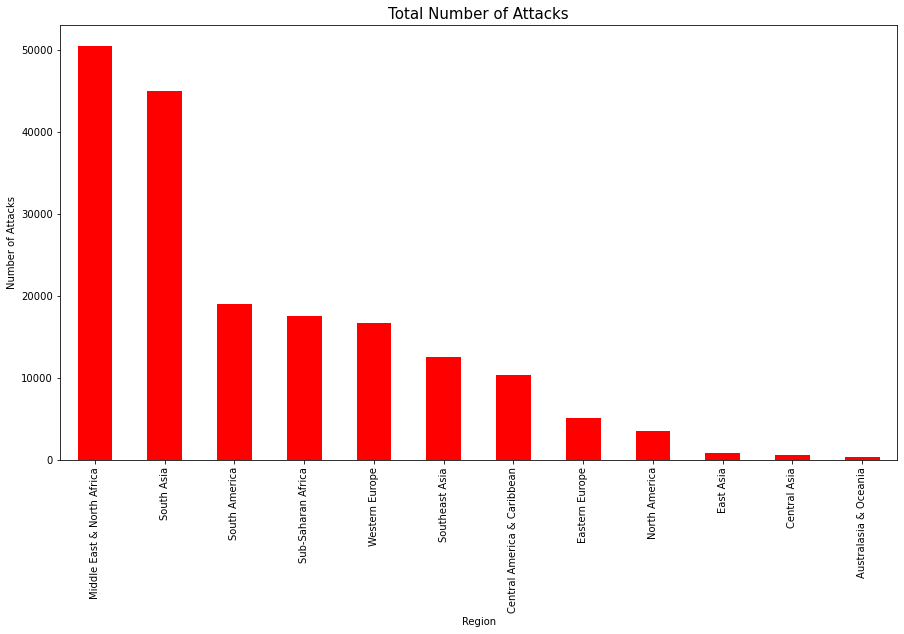

In [29]:
region.plot(kind="bar",figsize=(15,8),color="red")
plt.title("Total Number of Attacks",fontsize=15)
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [30]:
rt=df2[["Region","Killed","Wounded","Affected"]].groupby("Region").sum().sort_values(by="Affected",ascending=False)
rt

,Killed,Wounded,Affected
Region,,,
Middle East & North Africa,142188.0,224976.0,367164.0
South Asia,103193.0,147036.0,250229.0
Sub-Saharan Africa,81612.0,62192.0,143804.0
South America,32193.0,22329.0,54522.0
Central America & Caribbean,33352.0,16401.0,49753.0
Southeast Asia,16189.0,27645.0,43834.0
Western Europe,8518.0,25862.0,34380.0
North America,5102.0,21894.0,26996.0
Eastern Europe,7747.0,12801.0,20548.0


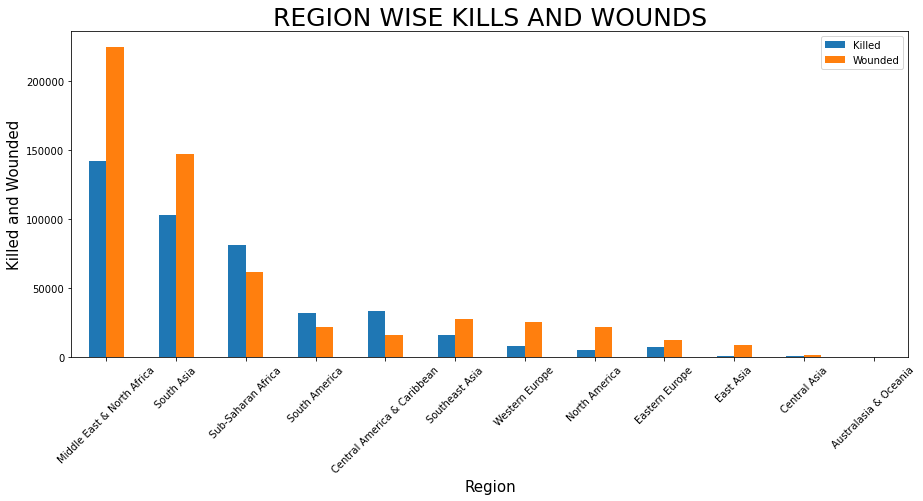

In [31]:
plt.rcParams["figure.figsize"] = (15,6)
rt.plot(y=["Killed", "Wounded"], kind="bar")

plt.xticks(rotation = 45)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Killed and Wounded',fontsize=15)
plt.title('REGION WISE KILLS AND WOUNDS', fontsize=25)
plt.show()

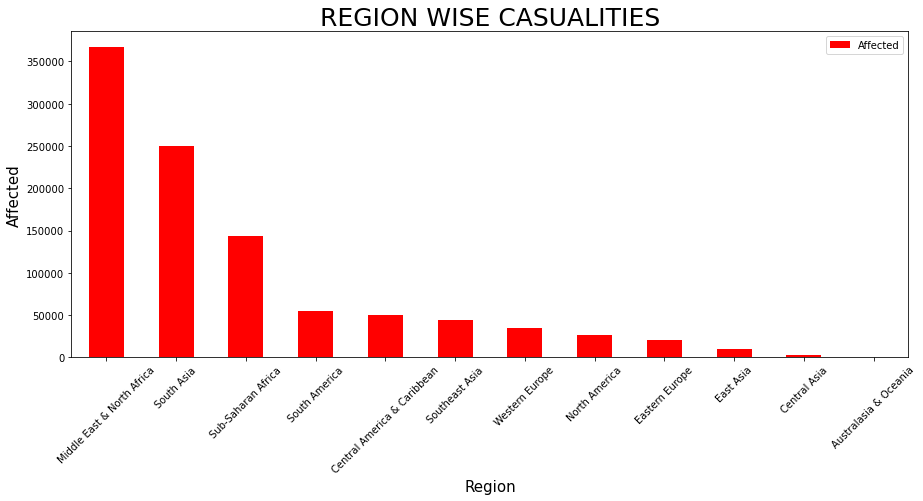

In [32]:
plt.rcParams["figure.figsize"] = (15,6)
rt.plot(y=["Affected"], kind="bar",color="red")

plt.xticks(rotation = 45)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Affected',fontsize=15)
plt.title('REGION WISE CASUALITIES', fontsize=25)
plt.show()

In [33]:
rt1=rt.sort_values('Killed')
print("\t"+"\t"+"STATS")
print(f2)

		STATS
       Killed  Wounded  Affected
Year                            
1970    258.0    368.0     626.0
1971    301.0    517.0     818.0
1977    716.0   1163.0    1879.0
1973    468.0   1182.0    1650.0
1972    654.0   1390.0    2044.0
1974    655.0   1552.0    2207.0
1975    923.0   1637.0    2560.0
1976    892.0   1665.0    2557.0
1978   1765.0   2185.0    3950.0
1979   2910.0   3892.0    6802.0
1980   5302.0   5181.0   10483.0
1981   6167.0   5446.0   11613.0
1989   8220.0   5641.0   13861.0
1999   3493.0   5668.0    9161.0
1982   6740.0   5976.0   12716.0
1990   7160.0   6188.0   13348.0
1987   6670.0   6207.0   12877.0
2000   4517.0   6349.0   10866.0
1985   7974.0   6588.0   14562.0
1988   7272.0   7107.0   14379.0
1986   5734.0   7113.0   12847.0
1983  11236.0   7170.0   18406.0
2002   4829.0   7420.0   12249.0
1984  11830.0   7451.0   19281.0
2003   3357.0   7693.0   11050.0
1991   8637.0   7879.0   16516.0
1994   7866.0   7926.0   15792.0
1998   4814.0   8612.0   13426.0
19

#### Some Observations from Graph:

1. Maximum number of Attacks in "Middle East & North Africa" is 50747.
2. Minimum number of Attacks in "Australia & Oceania" is 282.
3. Maximum number of Kills, Wounded & Affected person is in "MIddle east & North Africa" i.e. 142188 , 22496 , 367164
4. Minimum number of Kills, Wounded & Affected person is in "Australia & Oceania" i.e. 162 , 284 , 446

### 3) COUNTRY WISE ATTACK - TOP 10

In [34]:
ctry=df2["Country"].value_counts().head(10)
ctry

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

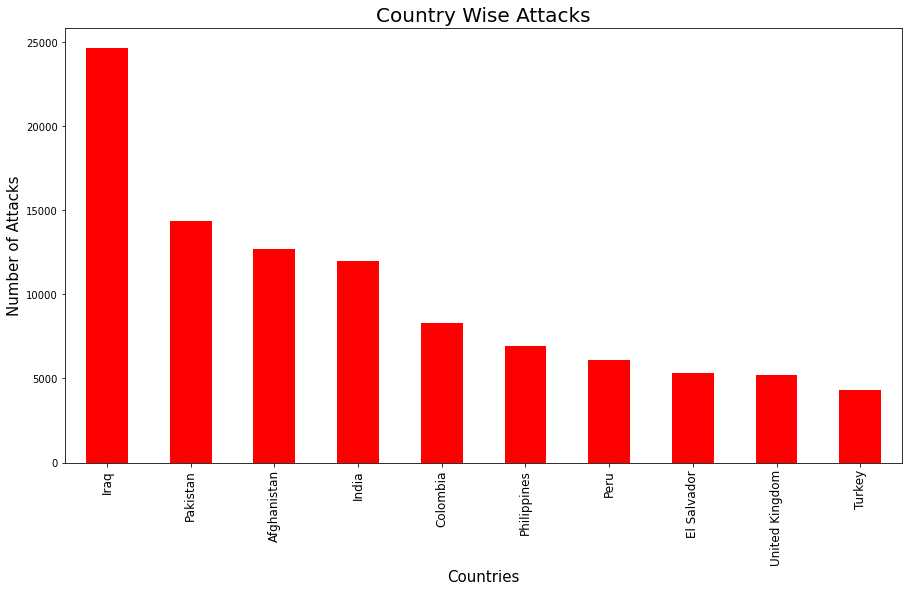

In [35]:
ctry.plot(kind="bar",color="red",figsize=(15,8))
plt.title("Country Wise Attacks",fontsize=20)
plt.xlabel("Countries",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [36]:
ctryA=df2[["Country","Affected"]].groupby("Country").sum().sort_values(by="Affected",ascending=False)
ctryA.head(10)

,Affected
Country,
Iraq,218527.0
Afghanistan,86610.0
Pakistan,67765.0
India,50123.0
Nigeria,36477.0
Syria,31657.0
Sri Lanka,31574.0
Colombia,27694.0
United States,24898.0


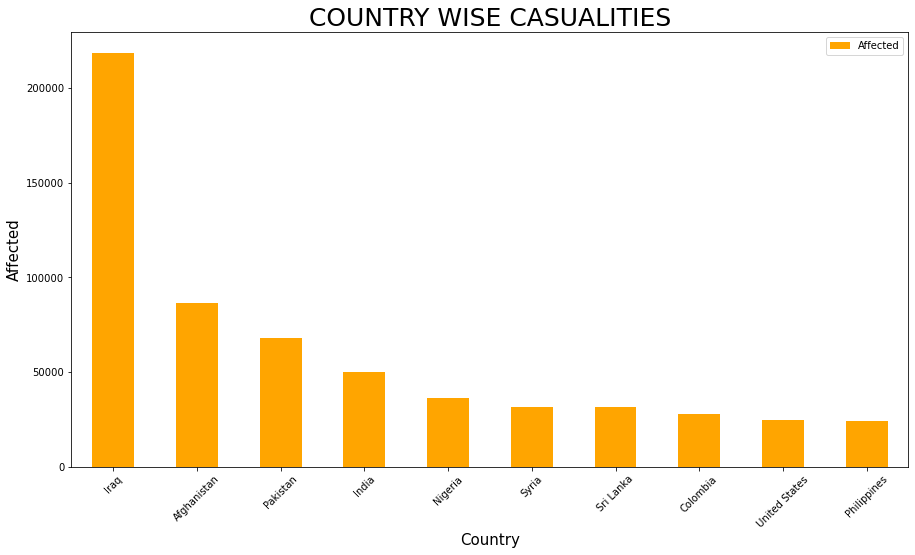

In [37]:
plt.rcParams["figure.figsize"] = (15,8)
ctryA.head(10).plot(y=["Affected"], kind="bar",color="orange")

plt.xticks(rotation = 45)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Affected',fontsize=15)
plt.title('COUNTRY WISE CASUALITIES', fontsize=25)
plt.show()

In [38]:
ctryk=df2[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
ctryk.head(10)

,Killed
Country,
Iraq,80039.0
Afghanistan,40122.0
Pakistan,24320.0
Nigeria,23266.0
India,19781.0
Syria,15769.0
Sri Lanka,15632.0
Colombia,15614.0
El Salvador,14815.0


In [39]:
ctryw=df2[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
ctryw.head(10)

,Wounded
Country,
Iraq,138488.0
Afghanistan,46488.0
Pakistan,43445.0
India,30342.0
United States,20981.0
Sri Lanka,15942.0
Syria,15888.0
Philippines,14276.0
Nigeria,13211.0


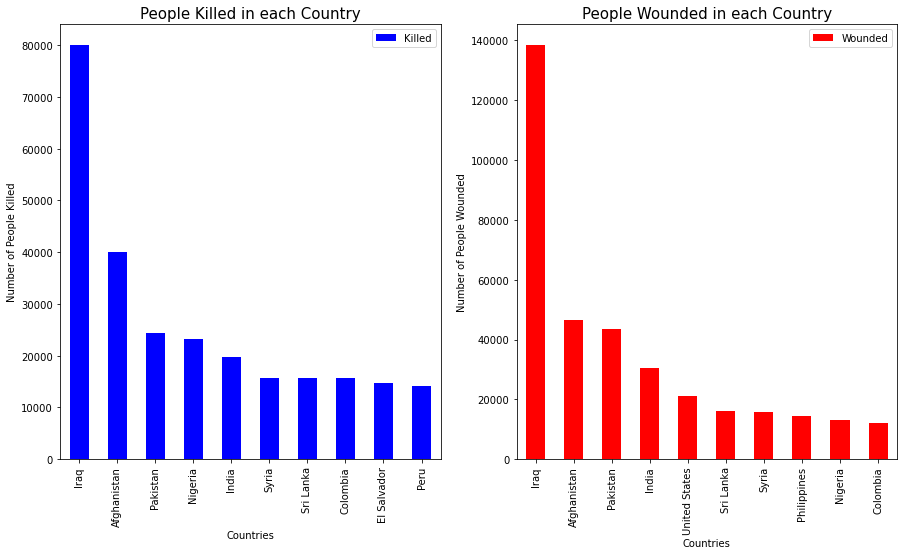

In [40]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ctryk[:10].plot(kind="bar",color="blue",figsize=(15,8),ax=ax0)
ax0.set_title("People Killed in each Country",fontsize=15)
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
ctryw[:10].plot(kind="bar",color="red",figsize=(15,8),ax=ax1)
ax1.set_title("People Wounded in each Country",fontsize=15)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

#### Some observation from Graph:

1. Maximum Number of Attacks is in "Iraq" is 24636.
2. Maximum Number of Kills is in "Iraq" is 80039.
3. Maximum Number of Wounded is in "Iraq" is 138488.
4. Maximum Number of Affected is in "Iraq" is 218527.
5. Number of Attacks and Affected in "INDIA" is 11960 and 50123.

### 4) CITY WISE ANALYSIS:


In [41]:
cty=df2["City"].value_counts()[1:11]
cty

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

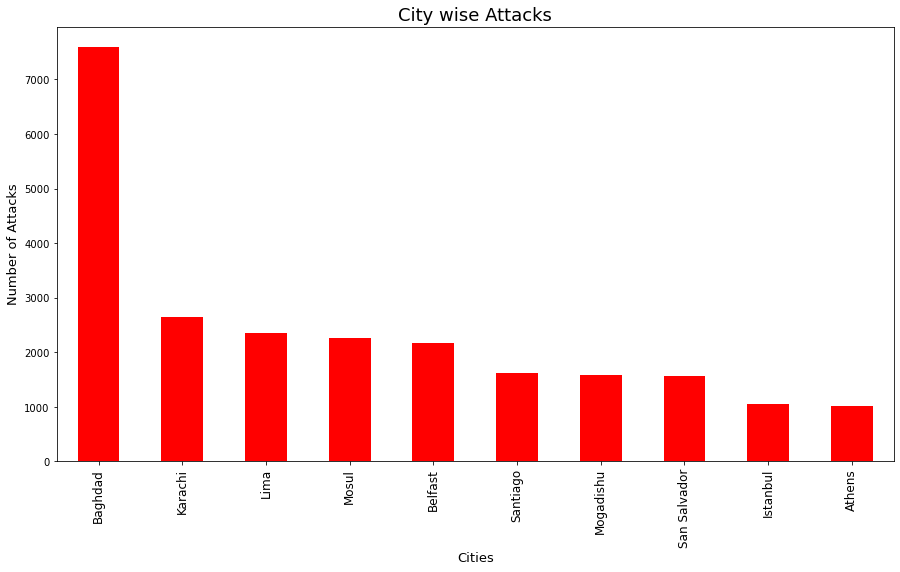

In [42]:
cty.plot(kind="bar",color="red",figsize=(15,8))
plt.title("City wise Attacks",fontsize=18)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [43]:
ctyA=df2[["City","Affected"]].groupby("City").sum().sort_values(by="Affected",ascending=False).drop("Unknown")
ctyA.head(10)

,Affected
City,
Baghdad,78699.0
New York City,19666.0
Mosul,13526.0
Mogadishu,9754.0
Karachi,9635.0
Kabul,8529.0
Beirut,7699.0
Kirkuk,6768.0
Aleppo,6060.0


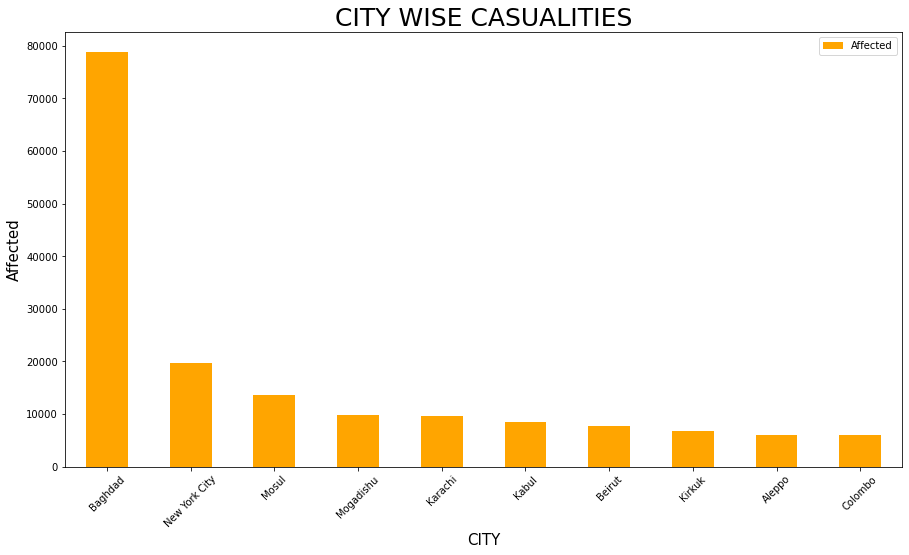

In [44]:
plt.rcParams["figure.figsize"] = (15,8)
ctyA.head(10).plot(y=["Affected"], kind="bar",color="orange")

plt.xticks(rotation = 45)
plt.xlabel('CITY',fontsize=15)
plt.ylabel('Affected',fontsize=15)
plt.title('CITY WISE CASUALITIES', fontsize=25)
plt.show()

In [45]:
ctyk=df2[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ctyk.head(10)

,Killed
City,
Baghdad,21335.0
Mosul,7340.0
Mogadishu,4199.0
Karachi,3722.0
New York City,2858.0
Tikrit,2705.0
Kabul,2505.0
Ramadi,2365.0
Maiduguri,2261.0


In [46]:
ctyw=df2[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
ctyw.head(10)

,Wounded
City,
Baghdad,57364.0
New York City,16808.0
Mosul,6186.0
Kabul,6024.0
Karachi,5913.0
Beirut,5611.0
Tokyo,5587.0
Mogadishu,5555.0
Kirkuk,5110.0


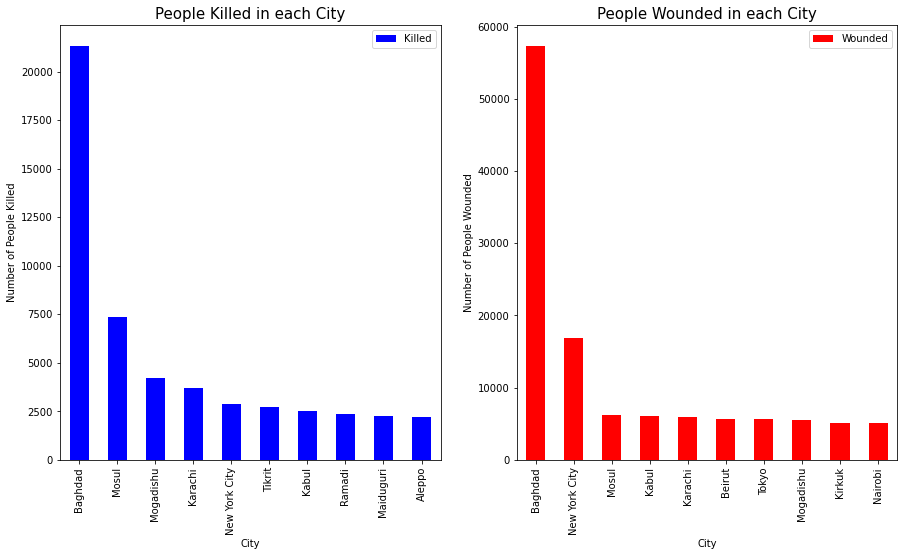

In [47]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ctyk[0:10].plot(kind="bar",color="blue",figsize=(15,8),ax=ax0)
ax0.set_title("People Killed in each City",fontsize=15)
ax0.set_xlabel("City")
ax0.set_ylabel("Number of People Killed")

#Wounded
ctyw[:10].plot(kind="bar",color="red",figsize=(15,8),ax=ax1)
ax1.set_title("People Wounded in each City",fontsize=15)
ax1.set_xlabel("City")
ax1.set_ylabel("Number of People Wounded")

plt.show()

#### Some observation from Graph: 

1. Maximum number of Attacks in "Baghdad" City is 7589.
2. Maximum number of Kills, Wounded & Affected person is in "Baghdad" i.e. 21335 , 57364 , 78699

### 5) TARGET TYPE ANALYSIS:

In [48]:
tt=df2["Target Type"].value_counts()
tt

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

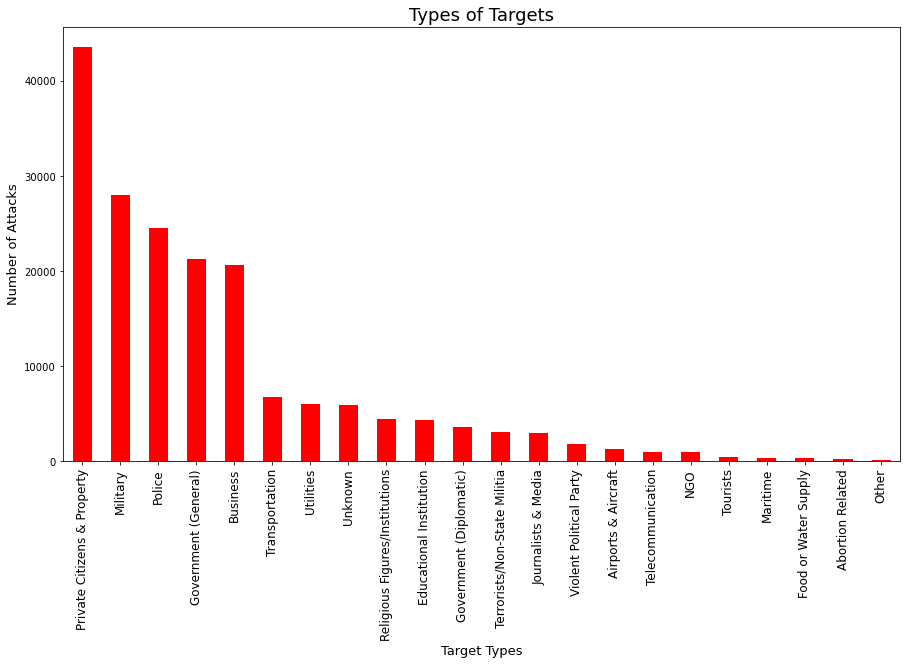

In [49]:
tt.plot(kind="bar",color="red",figsize=(15,8))
plt.title("Types of Targets",fontsize=18)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [50]:
ttA=df2[["Target Type","Affected"]].groupby("Target Type").sum().sort_values(by="Affected",ascending=False)
ttA

,Affected
Target Type,
Private Citizens & Property,338323.0
Military,193581.0
Police,124348.0
Business,86537.0
Government (General),72701.0
Transportation,56737.0
Religious Figures/Institutions,38828.0
Terrorists/Non-State Militia,18565.0
Educational Institution,14996.0


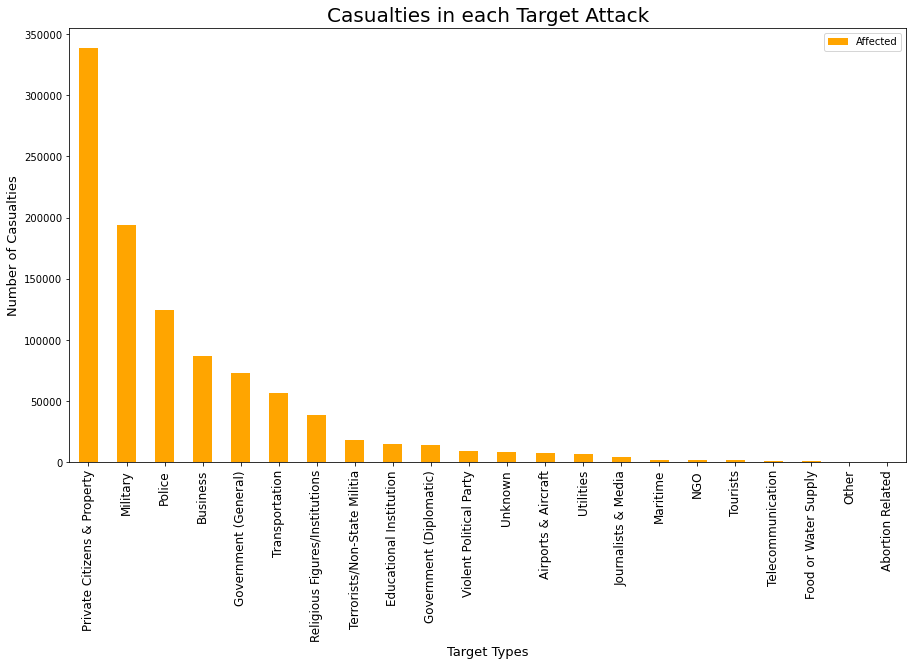

In [51]:
ttA.plot(kind="bar",color="orange",figsize=(15,8))
plt.title("Casualties in each Target Attack",fontsize=20)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [52]:
ttk=df2[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
ttk

,Killed
Target Type,
Private Citizens & Property,145366.0
Military,110741.0
Police,55220.0
Government (General),27929.0
Business,26453.0
Transportation,14708.0
Religious Figures/Institutions,13679.0
Terrorists/Non-State Militia,9280.0
Unknown,4519.0


In [53]:
ttw=df2[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
ttw

,Wounded
Target Type,
Private Citizens & Property,192957.0
Military,82840.0
Police,69128.0
Business,60084.0
Government (General),44772.0
Transportation,42029.0
Religious Figures/Institutions,25149.0
Government (Diplomatic),10998.0
Educational Institution,10893.0


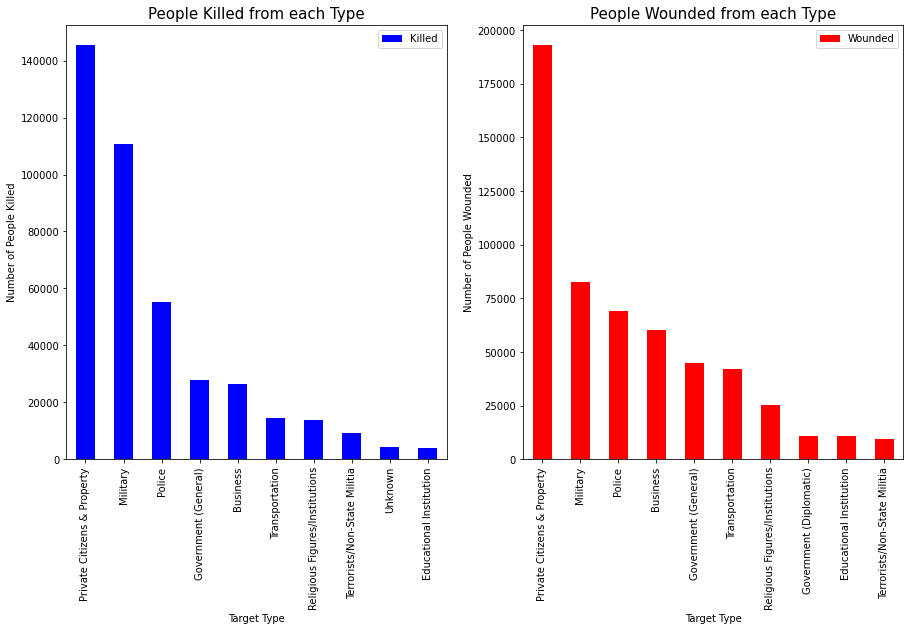

In [54]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ttk[:10].plot(kind="bar",color="blue",figsize=(15,8),ax=ax0)
ax0.set_title("People Killed from each Type",fontsize=15)
ax0.set_xlabel("Target Type")
ax0.set_ylabel("Number of People Killed")

#Wounded
ttw[:10].plot(kind="bar",color="red",figsize=(15,8),ax=ax1)
ax1.set_title("People Wounded from each Type",fontsize=15)
ax1.set_xlabel("Target Type")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### Some Observation from Graph: 

1. Maximum number of Attacks is done over "Private Citizens & Property" is 43511
2. Maximum number of Kills, Wounded & Affected person is done over "Private Citizens & Property" is 140504 , 178672 , 319176

### 6) TERRORIST GROUP ANALYSIS:

In [55]:
Tgrp=df2["Group Name"].value_counts()[1:10]
Tgrp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

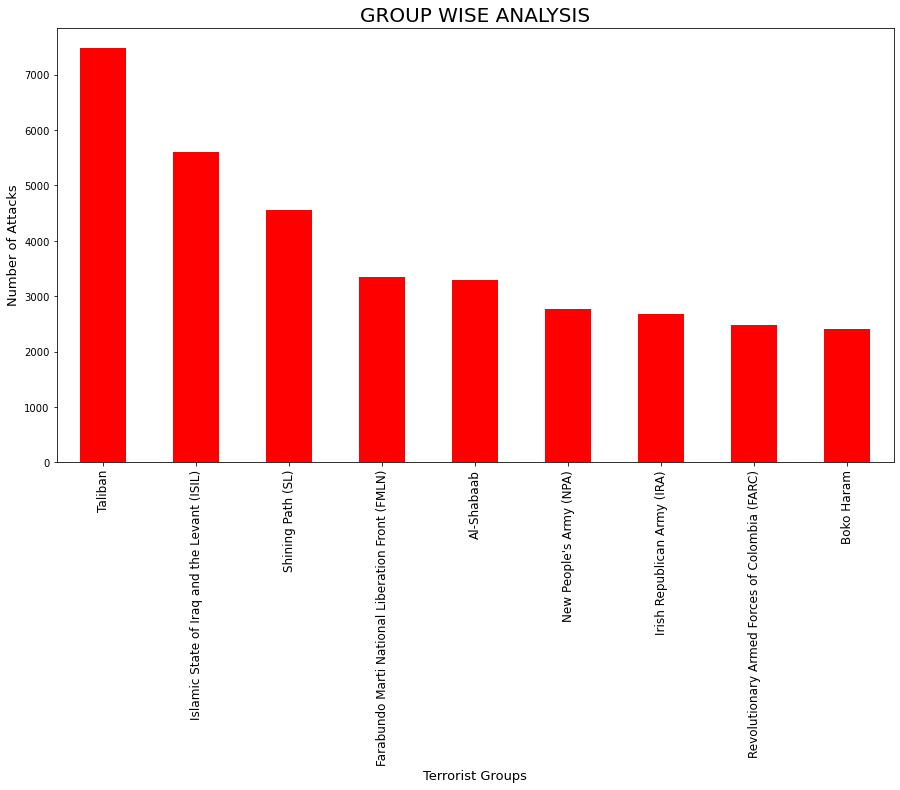

In [56]:
Tgrp.plot(kind="bar",color="red",figsize=(15,8))
plt.title("GROUP WISE ANALYSIS",fontsize=20)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [57]:
gca=df2[["Group Name","Affected"]].groupby("Group Name").sum().sort_values(by="Affected",ascending=False).drop("Unknown")
gca.head(10)

,Affected
Group Name,
Islamic State of Iraq and the Levant (ISIL),73206.0
Taliban,59584.0
Boko Haram,32104.0
Al-Qaida,28378.0
Liberation Tigers of Tamil Eelam (LTTE),22273.0
Al-Shabaab,20826.0
Shining Path (SL),17206.0
Farabundo Marti National Liberation Front (FMLN),16116.0
Tehrik-i-Taliban Pakistan (TTP),15739.0


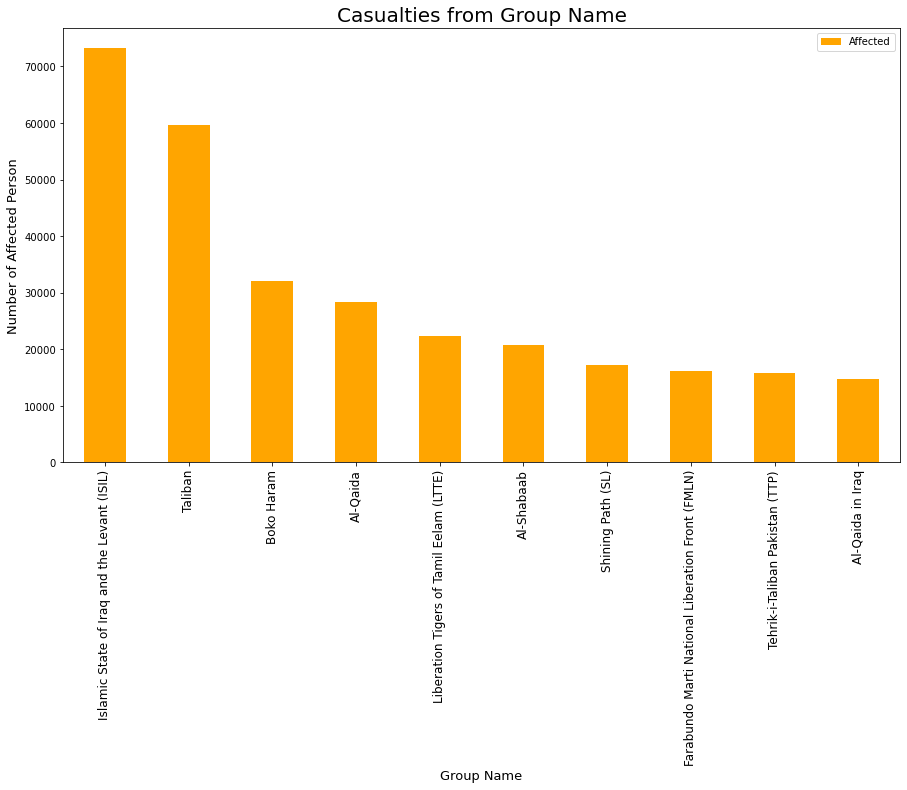

In [58]:
gca.head(10).plot(kind="bar",color="orange",figsize=(15,8))
plt.title("Casualties from Group Name",fontsize=20)
plt.xlabel("Group Name",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Affected Person",fontsize=13)
plt.show()

In [59]:
gck=df2[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gck.head(10)

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),40017.0
Taliban,29966.0
Boko Haram,20694.0
Shining Path (SL),12555.0
Liberation Tigers of Tamil Eelam (LTTE),11029.0
Al-Shabaab,10568.0
Farabundo Marti National Liberation Front (FMLN),9639.0
Nicaraguan Democratic Force (FDN),7430.0
Tehrik-i-Taliban Pakistan (TTP),6072.0


In [60]:
gcw=df2[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gcw.head(10)

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),33189.0
Taliban,29618.0
Al-Qaida,24518.0
Boko Haram,11410.0
Liberation Tigers of Tamil Eelam (LTTE),11244.0
Al-Qaida in Iraq,10430.0
Al-Shabaab,10258.0
Tehrik-i-Taliban Pakistan (TTP),9667.0
Irish Republican Army (IRA),6580.0


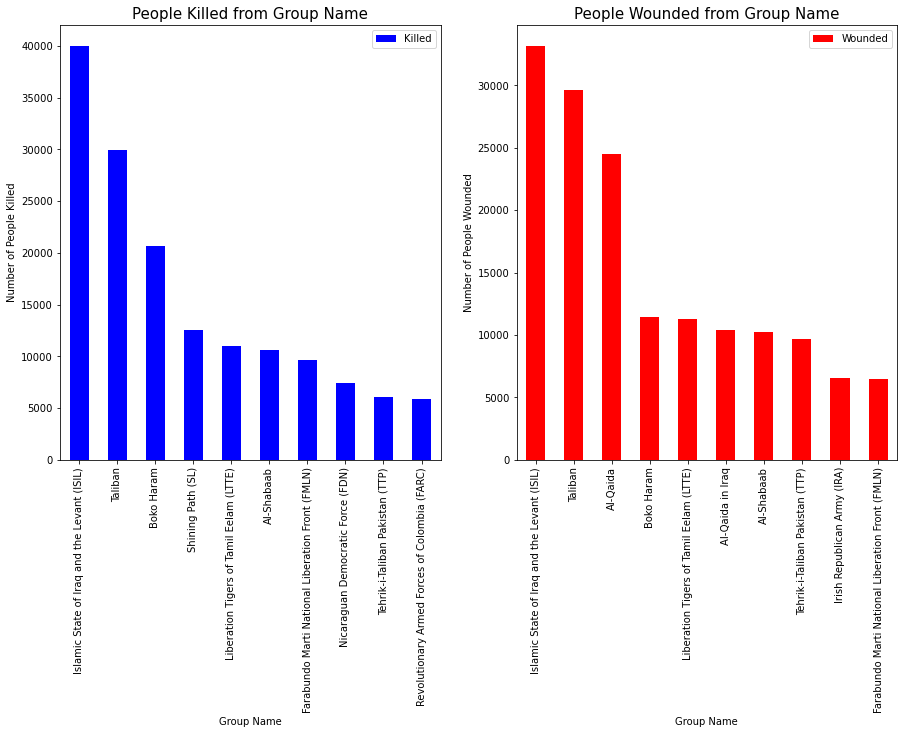

In [61]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gck[:10].plot(kind="bar",color="blue",figsize=(15,8),ax=ax0)
ax0.set_title("People Killed from Group Name",fontsize=15)
ax0.set_xlabel("Group Name")
ax0.set_ylabel("Number of People Killed")

#Wounded
gcw[:10].plot(kind="bar",color="red",figsize=(15,8),ax=ax1)
ax1.set_title("People Wounded from Group Name",fontsize=15)
ax1.set_xlabel("Group Name")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### Some observation from Graph:

1. Maximum number of Attacks is done by "Taliban" is 7478.
2. Maximum number of Kills, Wounded & Affected person is done by "Islamic State of Iraq and the Levant(ISIL)" is 
   38923 , 30672 & 69595.

### 7) ATTACK TYPE ANALYSIS:

In [62]:
at=df2["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

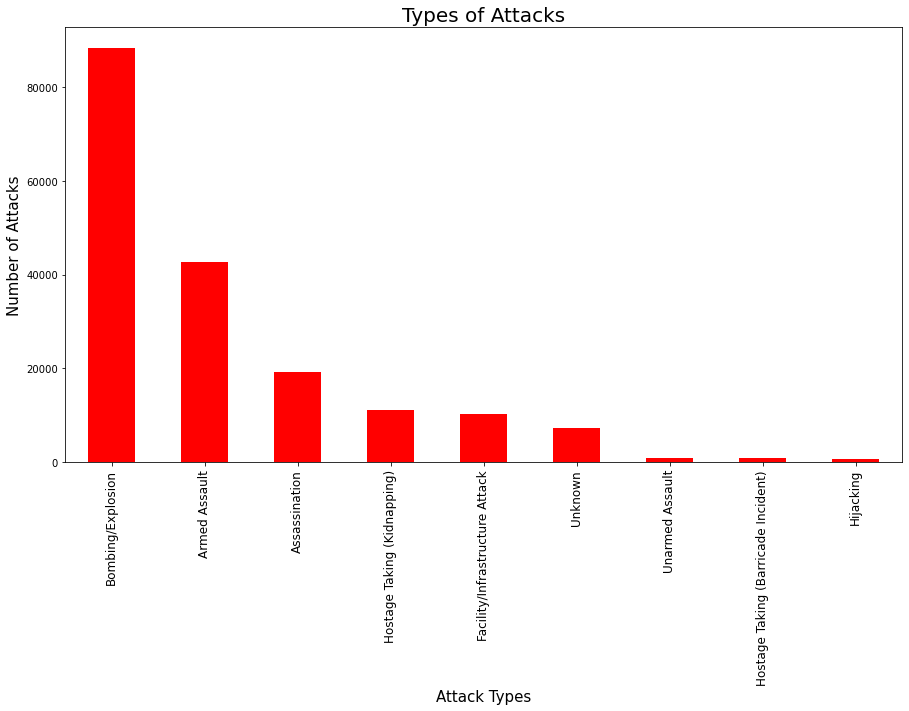

In [63]:
at.plot(kind="bar",color="red",figsize=(15,8))
plt.title("Types of Attacks",fontsize=20)
plt.xlabel("Attack Types",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [64]:
atc=df2[["Attack Type","Affected"]].groupby("Attack Type").sum().sort_values(by="Affected",ascending=False)
atc

,Affected
Attack Type,
Bombing/Explosion,554604.0
Armed Assault,255125.0
Unknown,51836.0
Hostage Taking (Kidnapping),44833.0
Assassination,42943.0
Hijacking,21026.0
Unarmed Assault,15214.0
Facility/Infrastructure Attack,10643.0
Hostage Taking (Barricade Incident),9071.0


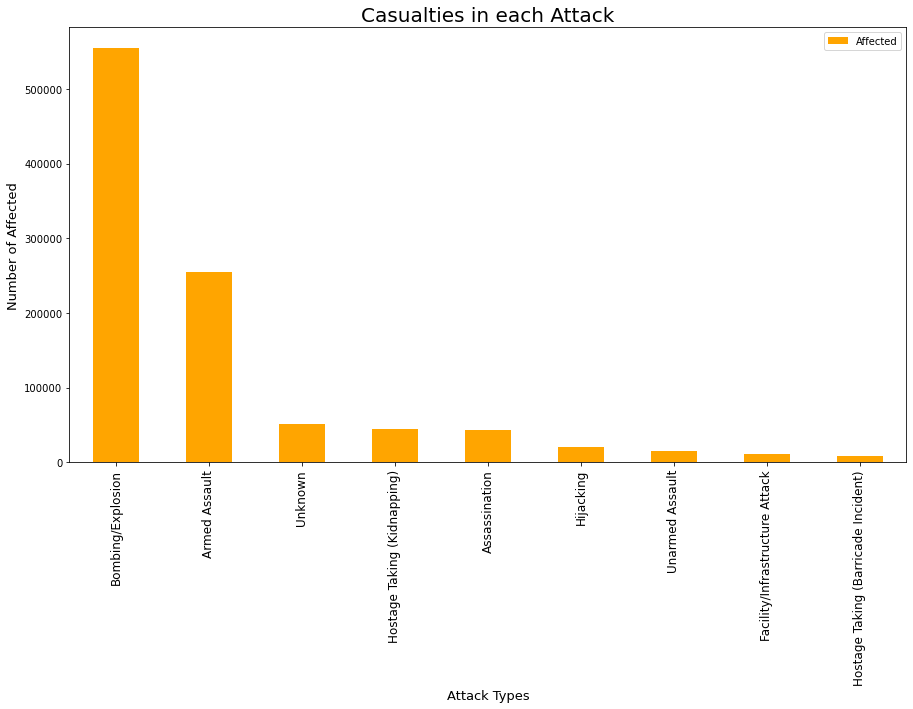

In [65]:
atc.plot(kind="bar",color="orange",figsize=(15,8))
plt.title("Casualties in each Attack",fontsize=20)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Affected",fontsize=13)
plt.show()

In [66]:
atk=df2[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
atk

,Killed
Attack Type,
Bombing/Explosion,165187.0
Armed Assault,164929.0
Unknown,33799.0
Hostage Taking (Kidnapping),29327.0
Assassination,25078.0
Facility/Infrastructure Attack,4778.0
Hostage Taking (Barricade Incident),4664.0
Hijacking,3824.0
Unarmed Assault,908.0


In [67]:
atw=df2[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
atw

,Wounded
Attack Type,
Bombing/Explosion,389417.0
Armed Assault,90196.0
Unknown,18037.0
Assassination,17865.0
Hijacking,17202.0
Hostage Taking (Kidnapping),15506.0
Unarmed Assault,14306.0
Facility/Infrastructure Attack,5865.0
Hostage Taking (Barricade Incident),4407.0


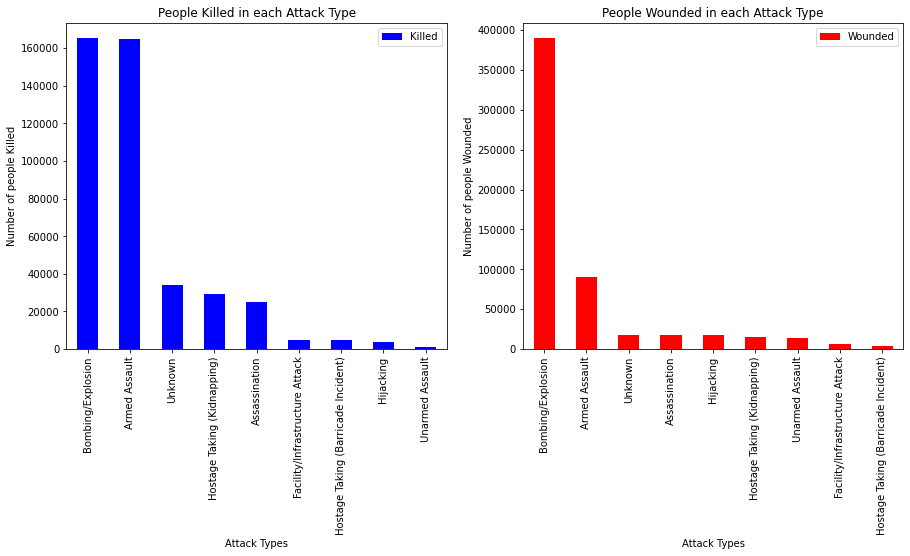

In [68]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
atk.plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
atw.plot(kind="bar",color="red",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### Some Observation from Graph:

1. Most number of attacks : 88255 by "Bombing/Explosion"
2. Most number of casualties : 530007 by "Bombing/Explosion"
3. Most number of people killed : 160297 by "Armed Assault"
4. Most number of people wounded : 372686 by "Bombing/Explosion"


### 8) Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017:

In [69]:
casualty=df2.loc[:,"Affected"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 1005295.0


In [70]:
kill=df2.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 432494.0


In [72]:
wound=df2.loc[:,"Wounded"].sum()
print("Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :
 572801.0


## ------------------------------------------------------THANK YOU----------------------------------------------------------